In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-09-25 19:36:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.009s  

2023-09-25 19:36:52 (5.39 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
#Convert categorical data to numbers
dataset = pd.concat([dataset, pd.get_dummies(dataset['sex'])], axis=1).reindex(dataset.index)
dataset.drop('sex', axis=1, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['smoker'])], axis=1).reindex(dataset.index)
dataset.drop('smoker', axis=1, inplace=True)

dataset = pd.concat([dataset, pd.get_dummies(dataset['region'])], axis=1).reindex(dataset.index)
dataset.drop('region', axis=1, inplace=True)

In [ ]:
y = dataset.pop('expenses')
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, y, test_size=0.2)

In [ ]:
# Build the neural network
# By Experiment, i found that optimizer 'adam' better than 'sgd' in this case
model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error','mean_squared_error'], optimizer='adam')
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), verbose=2, epochs=500)

Epoch 1/500
34/34 - 2s - loss: 13248.4082 - mean_absolute_error: 13248.4082 - mean_squared_error: 321166784.0000 - val_loss: 13284.8848 - val_mean_absolute_error: 13284.8848 - val_mean_squared_error: 326442496.0000 - 2s/epoch - 64ms/step
Epoch 2/500
34/34 - 0s - loss: 13204.7617 - mean_absolute_error: 13204.7617 - mean_squared_error: 319979200.0000 - val_loss: 13220.8135 - val_mean_absolute_error: 13220.8135 - val_mean_squared_error: 324630400.0000 - 204ms/epoch - 6ms/step
Epoch 3/500
34/34 - 0s - loss: 13110.9365 - mean_absolute_error: 13110.9365 - mean_squared_error: 317347072.0000 - val_loss: 13083.9521 - val_mean_absolute_error: 13083.9521 - val_mean_squared_error: 320792160.0000 - 187ms/epoch - 6ms/step
Epoch 4/500
34/34 - 0s - loss: 12917.6113 - mean_absolute_error: 12917.6113 - mean_squared_error: 311959712.0000 - val_loss: 12815.9443 - val_mean_absolute_error: 12815.9443 - val_mean_squared_error: 313390720.0000 - 227ms/epoch - 7ms/step
Epoch 5/500
34/34 - 0s - loss: 12561.3037 

9/9 - 0s - loss: 2389.3879 - mean_absolute_error: 2389.3879 - mean_squared_error: 29448652.0000 - 32ms/epoch - 4ms/step
Testing set Mean Abs Error: 2389.39 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


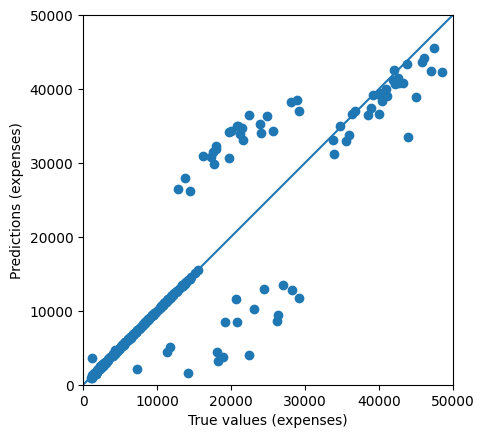

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
